In [101]:
import os
import pandas as pd
from matplotlib import pyplot as plt

In [56]:
#Read csv file
df = pd.read_csv("data/AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023007,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021807,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020206,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020706,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021307,18362400.0


In [39]:
def get_max_close(symbol):
    '''Get the maximum closing price of the symbol passed'''
    df = pd.read_csv("data/{}.csv".format(symbol))
    return df['Close'].max()

In [46]:
get_max_close('IBM')

215.80000299999998

In [43]:
def get_mean_volume(symbol):
    '''Get the mean volume'''
    df = pd.read_csv("data/{}.csv".format(symbol))
    return df['Volume'].mean()

In [47]:
get_mean_volume("AAPL")

1855410200.0

In [51]:
def plot_high_price(symbol):
    '''plot the high price of the symbol'''
    df = pd.read_csv("data/{}.csv".format(symbol))
    df['High'].plot()
    plt.show()

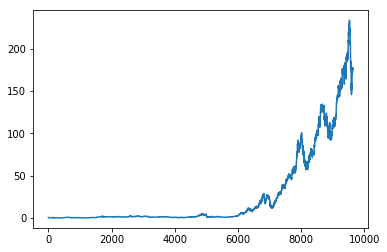

In [53]:
plot_high_price('AAPL')

In [54]:
def plot_multiple_columns(symbol, attribute1, attribute2 ):
    '''plot the high price of the symbol'''
    df = pd.read_csv("data/{}.csv".format(symbol))
    df[[attribute1, attribute2]].plot()
    plt.show()

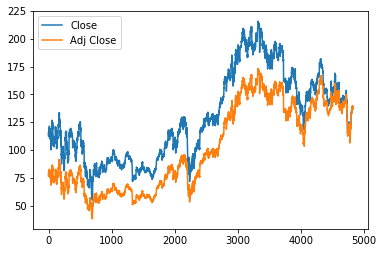

In [55]:
plot_multiple_columns('IBM', 'Close', 'Adj Close')

In [146]:
#Build empty data frame with date range
start_date = "2010-01-20"
end_date = "2010-01-28"
dates = pd.date_range(start_date, end_date)
df1 = pd.DataFrame(index = dates)  #Empty data frame
dfSPY = pd.read_csv("data/SPY.csv", index_col="Date", parse_dates=True,
                   usecols=["Date", "Adj Close"], na_values=['nan'])
df1 = df1.join(dfSPY, how='inner')   #left join
# df1.dropna() #drop the nan rows
df1

,Adj Close
2010-01-20,95.012680
2010-01-21,93.185669
2010-01-22,91.108398
2010-01-25,91.575562
2010-01-26,91.191818
2010-01-27,91.625595
2010-01-28,90.574471


In [147]:
#Read and create dateframe from multiple data
symbols = ['GOOG', 'IBM', 'GLD']
for symbol in symbols:
    df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col="Date", parse_dates=True,
                   usecols=["Date", "Adj Close"], na_values=['nan'])
    df_temp = df_temp.rename(columns={'Adj Close': symbol})
    df1 = df1.join(df_temp, how='inner')

df1

,Adj Close,GOOG,IBM,GLD
2010-01-20,95.012680,288.329681,98.809929,108.940002
2010-01-21,93.185669,289.606384,97.861649,107.370003
2010-01-22,91.108398,273.227905,95.206505,107.169998
2010-01-25,91.575562,268.255249,95.676834,107.480003
2010-01-26,91.191818,269.457428,95.396156,107.559998
2010-01-27,91.625595,269.298462,95.836143,106.529999
2010-01-28,90.574471,265.418701,93.878906,106.480003


In [149]:
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col="Date", parse_dates=True,
                   usecols=["Date", "Adj Close"], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])

    return df

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

In [103]:
def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-22', '2010-01-26')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    print (df)


if __name__ == "__main__":
    test_run()

                  SPY        GOOG        IBM         GLD
2010-01-22  91.108398  273.227905  95.206505  107.169998
2010-01-25  91.575562  268.255249  95.676834  107.480003
2010-01-26  91.191818  269.457428  95.396156  107.559998


In [108]:
df1

,Adj Close,GOOG,IBM,GLD
2010-01-20,95.012680,288.329681,98.809929,108.940002
2010-01-21,93.185669,289.606384,97.861649,107.370003
2010-01-22,91.108398,273.227905,95.206505,107.169998
2010-01-25,91.575562,268.255249,95.676834,107.480003
2010-01-26,91.191818,269.457428,95.396156,107.559998
2010-01-27,91.625595,269.298462,95.836143,106.529999
2010-01-28,90.574471,265.418701,93.878906,106.480003


In [128]:
#slicing operation
df1.loc['2010-01-22':'2010-01-26']  # row slicing

,Adj Close,GOOG,IBM,GLD
2010-01-22,91.108398,273.227905,95.206505,107.169998
2010-01-25,91.575562,268.255249,95.676834,107.480003
2010-01-26,91.191818,269.457428,95.396156,107.559998


In [133]:
df1['GOOG']  #Column slining one column
df1[['GOOG', 'IBM']] #Column slining multiple columns

,GOOG,IBM
2010-01-20,288.329681,98.809929
2010-01-21,289.606384,97.861649
2010-01-22,273.227905,95.206505
2010-01-25,268.255249,95.676834
2010-01-26,269.457428,95.396156
2010-01-27,269.298462,95.836143
2010-01-28,265.418701,93.878906


In [138]:
df1.loc['2010-01-22':'2010-01-26', ['GOOG', 'IBM']] #Slicing in both directions

,GOOG,IBM
2010-01-22,273.227905,95.206505
2010-01-25,268.255249,95.676834
2010-01-26,269.457428,95.396156


In [142]:
df1 = df1 / df1.iloc[0]
df1

,Adj Close,GOOG,IBM,GLD
2010-01-20,1.000000,1.000000,1.000000,1.000000
2010-01-21,0.980771,1.004428,0.990403,0.985588
2010-01-22,0.958908,0.947623,0.963532,0.983752
2010-01-25,0.963825,0.930377,0.968292,0.986598
2010-01-26,0.959786,0.934546,0.965451,0.987332
2010-01-27,0.964351,0.933995,0.969904,0.977878
2010-01-28,0.953288,0.920539,0.950096,0.977419


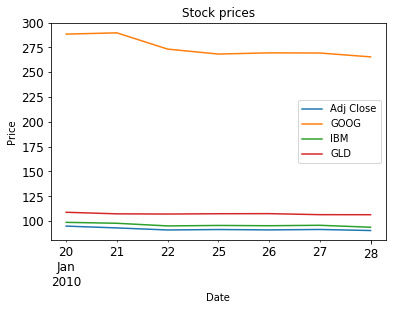

In [150]:
plot_data(df1)

In [156]:
def normalize_data(df):
    return df/df.iloc[0]

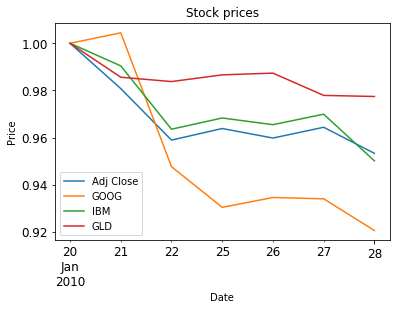

In [158]:
plot_data(normalize_data(df1))